## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
boston = datasets.load_boston()

In [ ]:
import seaborn as sns
import pandas as pd
boston_df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= list(boston['feature_names']) + ['target'])
sns.pairplot(boston_df)
plt.show()

Coefficients:  [[8.95430408]]
Intercept:  [-33.70897217]
Mean squared error: 32.40


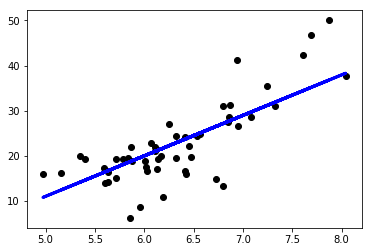

In [4]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston.data[:, 5].reshape(-1,1)
y = boston.target.reshape(-1,1)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()